**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Loading Dataset**

In [2]:
# Reading data set
raw_data=pd.read_csv(r"C:\Users\syhussain\Downloads\forestfires.csv")

print(raw_data.shape)

(517, 13)


**Synthesising Data**

**As the data is less so increasing the data by synthesising it**

In [3]:
# Number of synthetic samples to generate
num_synthetic_samples = 1000

# Synthesize new data points by adding random noise to each original data point
synthetic_rows = []
for i in range(num_synthetic_samples):
    row = {}
    for column in raw_data.columns:
        if column in ['month', 'day']:
            # Handle categorical columns by randomly choosing from the existing categories
            categories = raw_data[column].unique()
            row[column] = np.random.choice(categories)
        else:
            # Add random noise to numerical columns
            row[column] = raw_data[column].iloc[i % len(raw_data)]
    
    synthetic_rows.append(row)

# Convert the list of synthetic rows to a DataFrame
synthetic_data = pd.DataFrame(synthetic_rows)

# Combine the original and synthetic data into a new DataFrame
data = pd.concat([raw_data, synthetic_data], ignore_index=True)

# Display the shape of synthesized DataFrame
print(data.shape)

(1517, 13)


In [4]:
# Checking duplicates as we increased the dataset
data.duplicated().sum()

16

In [5]:
#list of columns
print(data.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [6]:
#check mising values
print(list(data.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False]


In [7]:
data.describe()

X            Y         FFMC          DMC           DC  \
count  1517.000000  1517.000000  1517.000000  1517.000000  1517.000000   
mean      4.680949     4.303230    90.600989   110.176994   545.748846   
std       2.312291     1.231329     5.518376    64.216026   249.723584   
min       1.000000     2.000000    18.700000     1.100000     7.900000   
25%       3.000000     4.000000    90.200000    62.300000   430.800000   
50%       4.000000     4.000000    91.600000   108.300000   664.200000   
75%       7.000000     5.000000    92.800000   141.300000   713.900000   
max       9.000000     9.000000    96.200000   291.300000   860.600000   

               ISI         temp           RH         wind         rain  \
count  1517.000000  1517.000000  1517.000000  1517.000000  1517.000000   
mean      8.951351    18.731905    44.310481     4.009822     0.015689   
std       4.501323     5.718621    16.280740     1.792086     0.245791   
min       0.000000     2.200000    15.000000     0.400000     0.000000   
25%       6.400000    15.400000    33.000000     2.700000     0.000000   
50%       8.400000    19.200000    42.000000     4.000000     0.000000   
75%      10.600000    22.600000    53.000000     4.900000     0.000000   
max      56.100000    33.300000   100.000000     9.400000     6.400000   

              area  
count  1517.000000  
mean     12.907053  
std      64.275776  
min       0.000000  
25%       0.000000  
50%       0.520000  
75%       6.540000  
max    1090.840000

## Explarotary Data Analysis

## Univariate Analysis

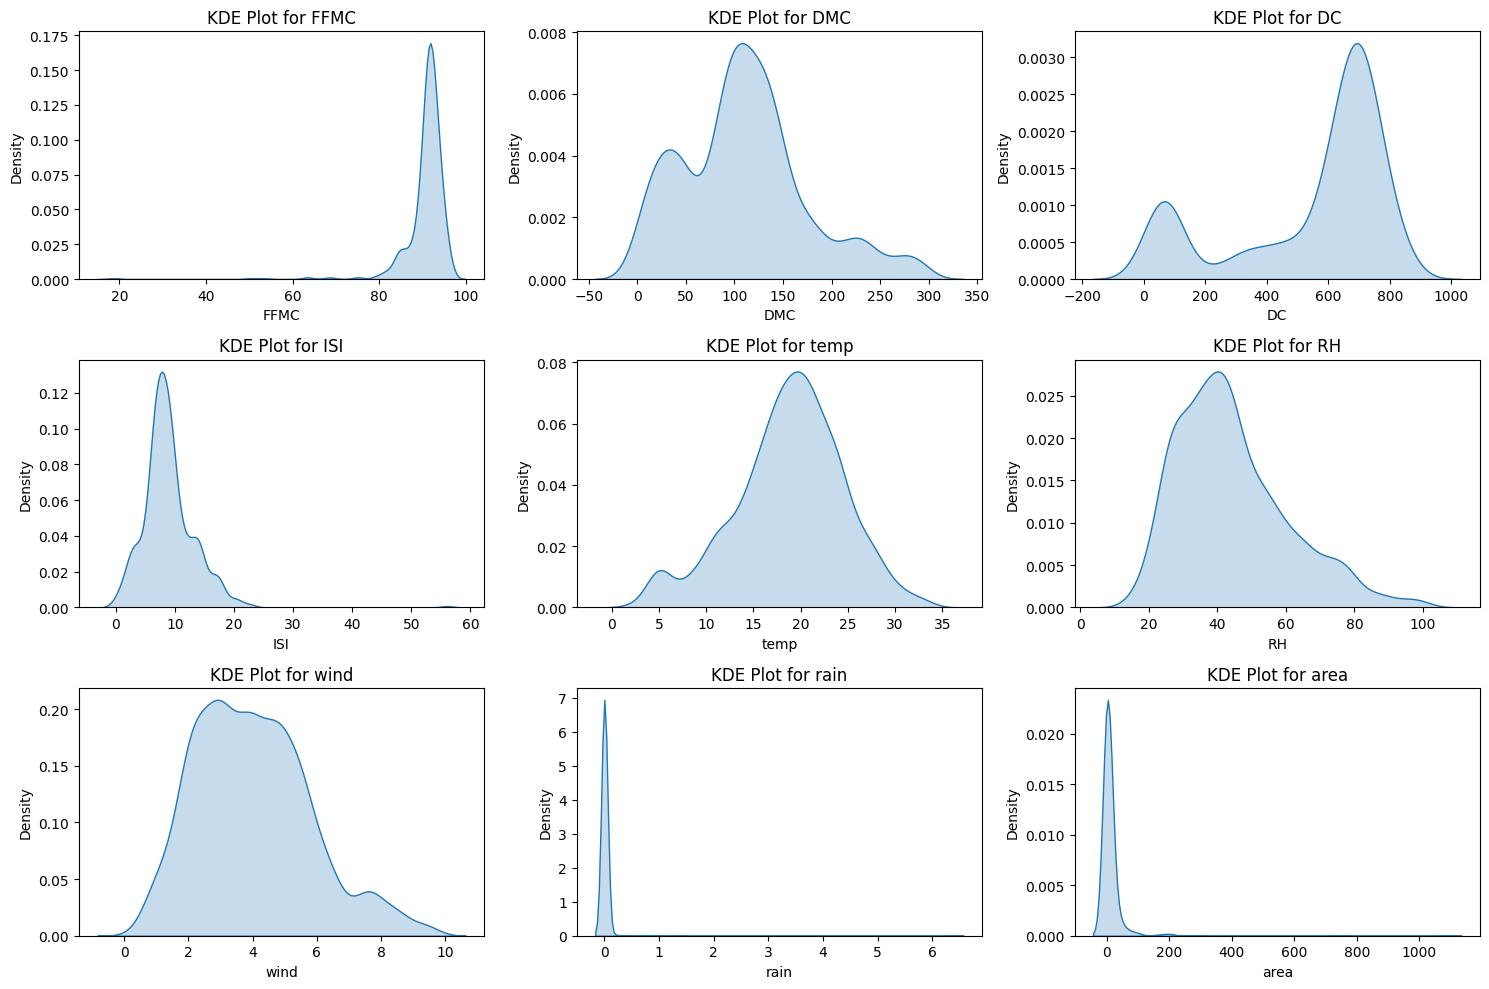

In [8]:
# KDE plots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data[column], fill=True)
    plt.title(f'KDE Plot for {column}')
plt.tight_layout()
plt.show()


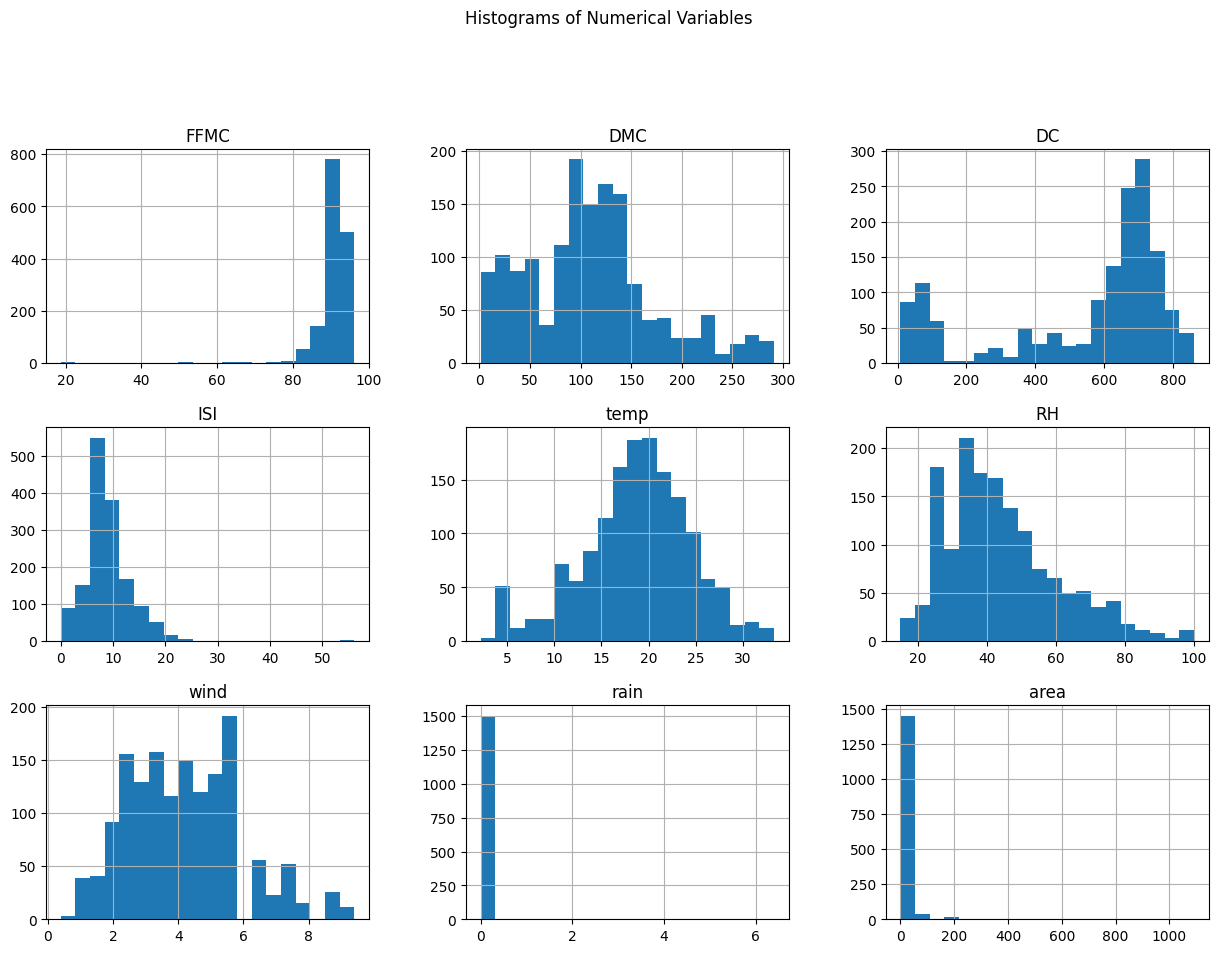

In [9]:
# Histograms for numerical variables
data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()

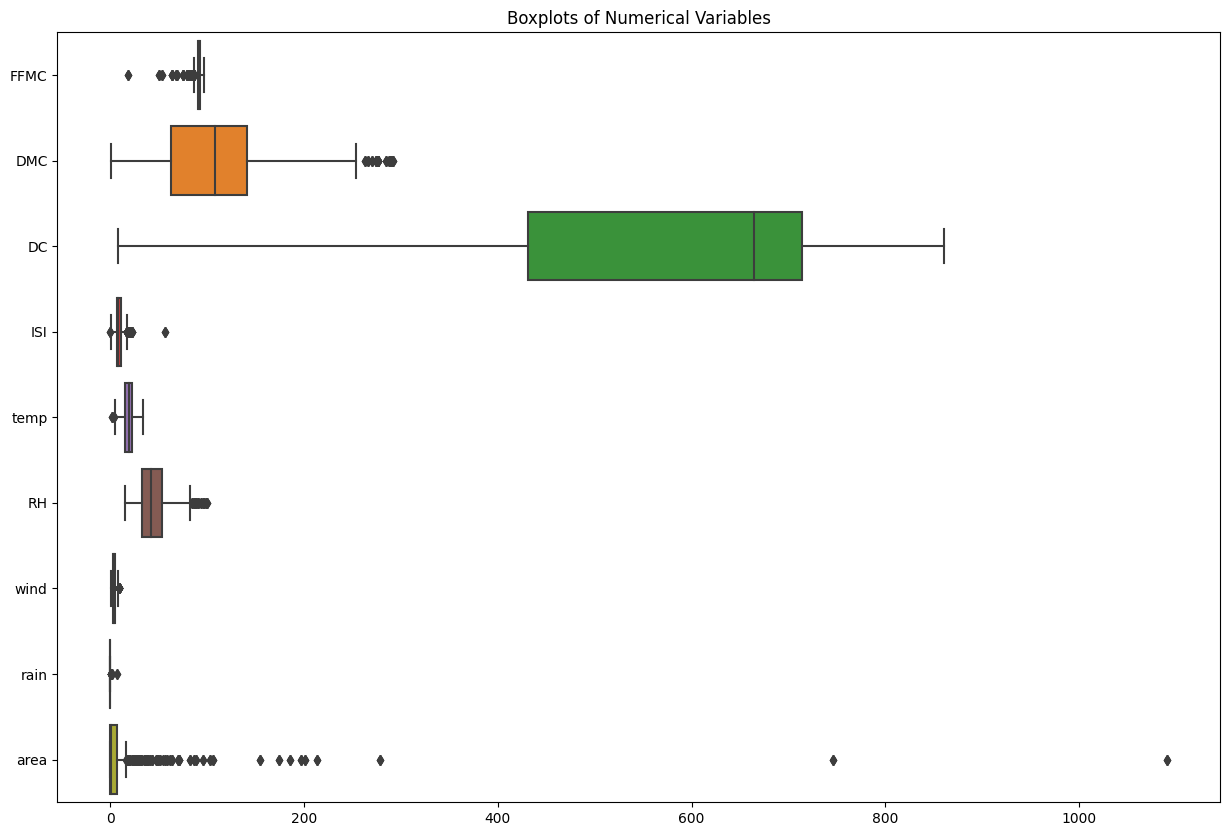

In [10]:
# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']], orient='h')
plt.title('Boxplots of Numerical Variables')
plt.show()

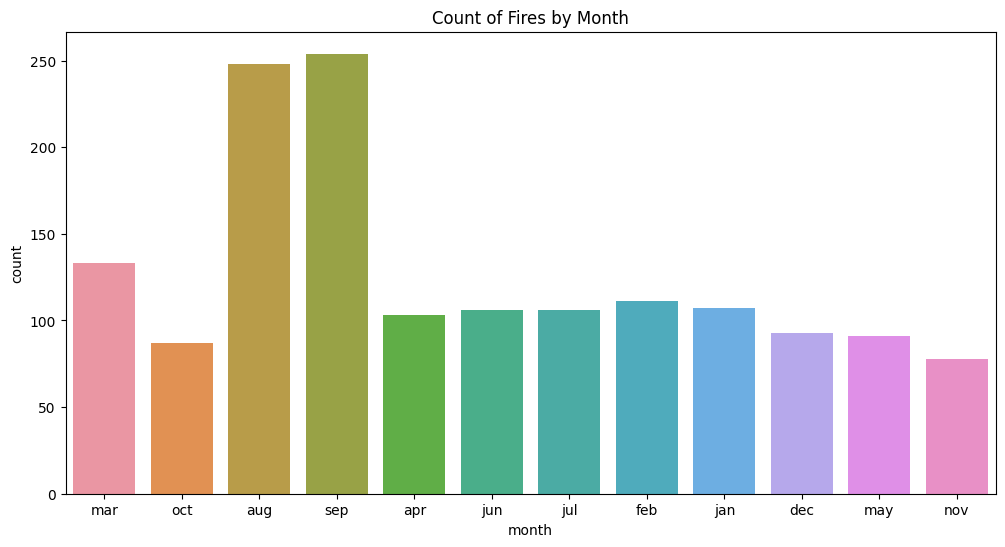

In [11]:
# Countplot for categorical variables 'month' and 'day'
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=data)
plt.title('Count of Fires by Month')
plt.show()

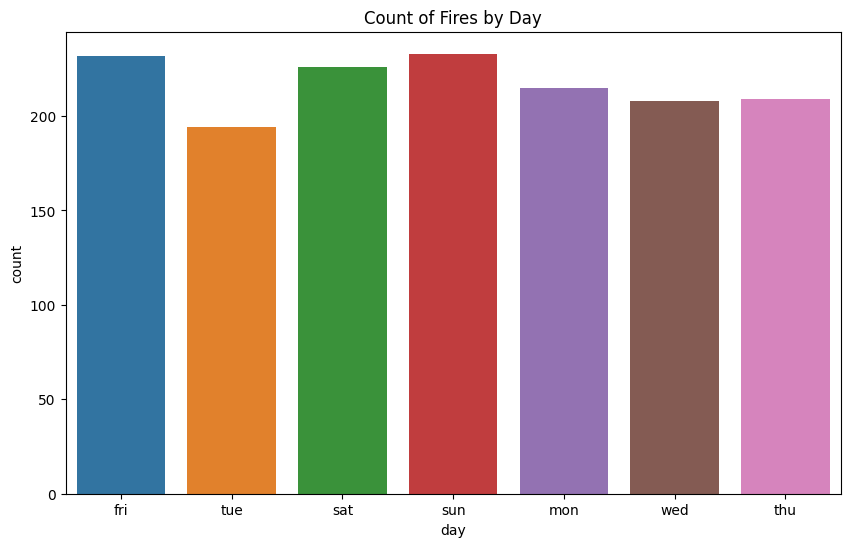

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=data)
plt.title('Count of Fires by Day')
plt.show()

# Bivariate Analysis

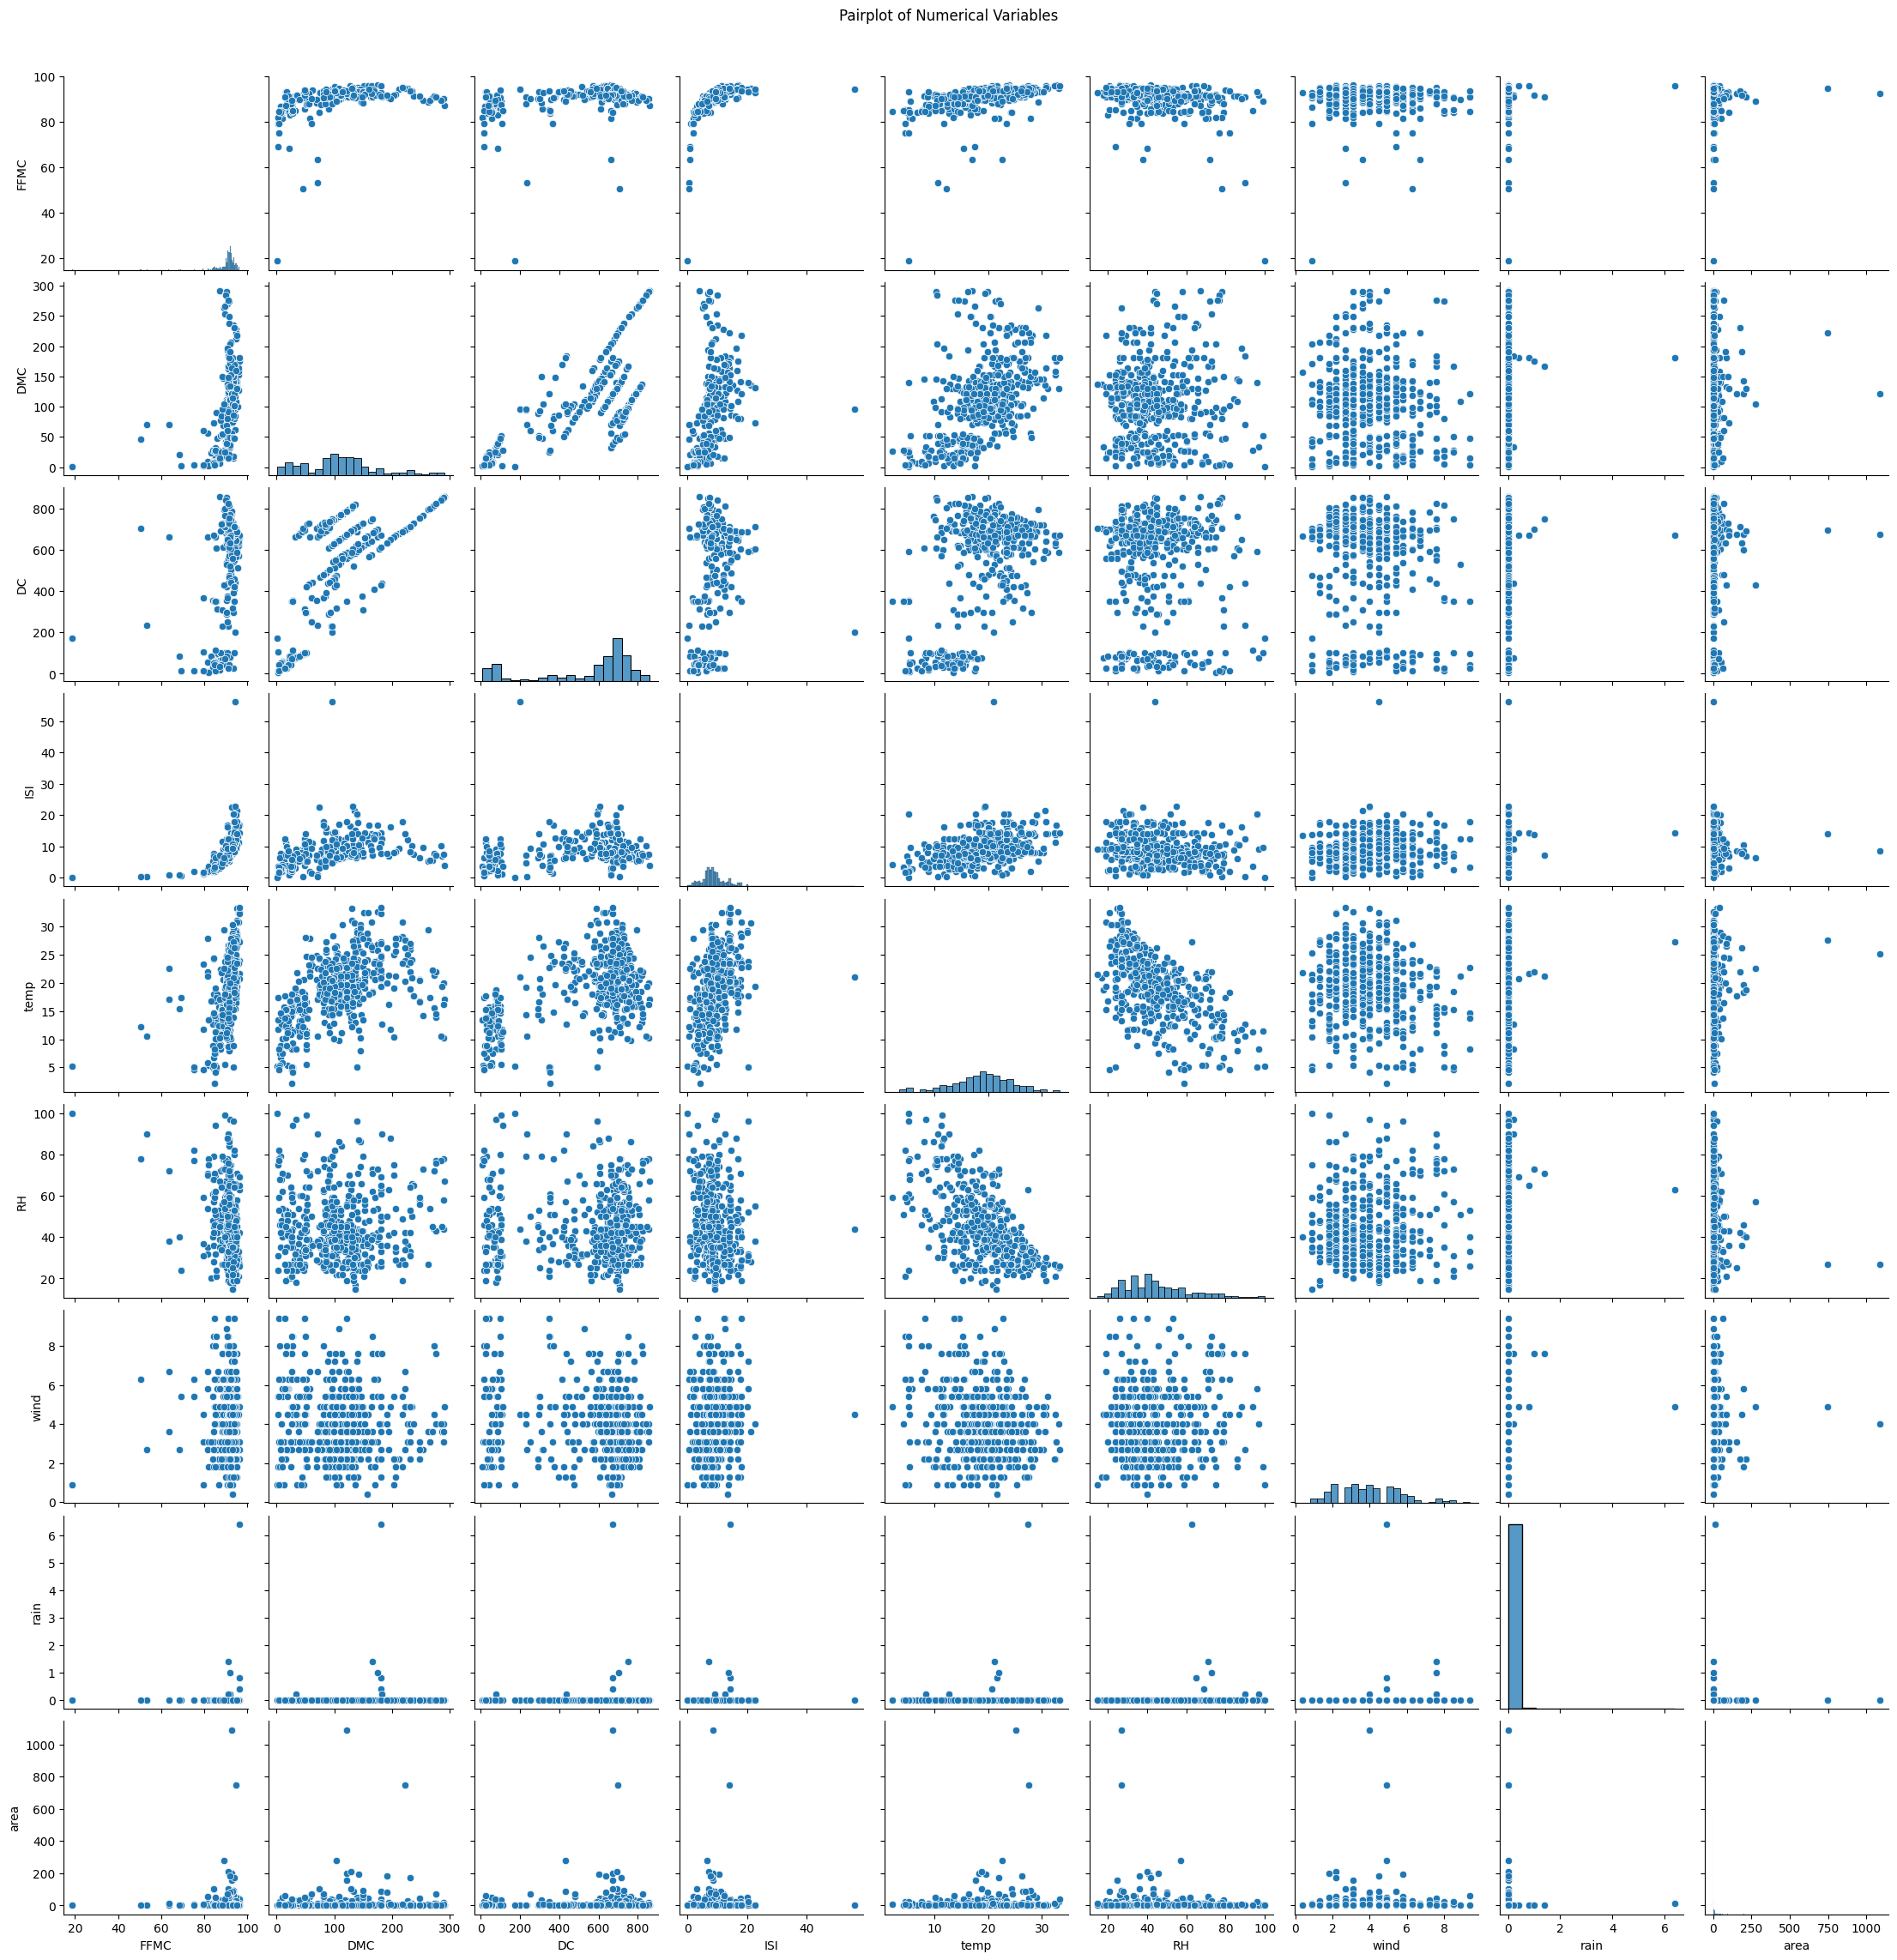

In [13]:
# Pairplot for numerical variables
sns.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

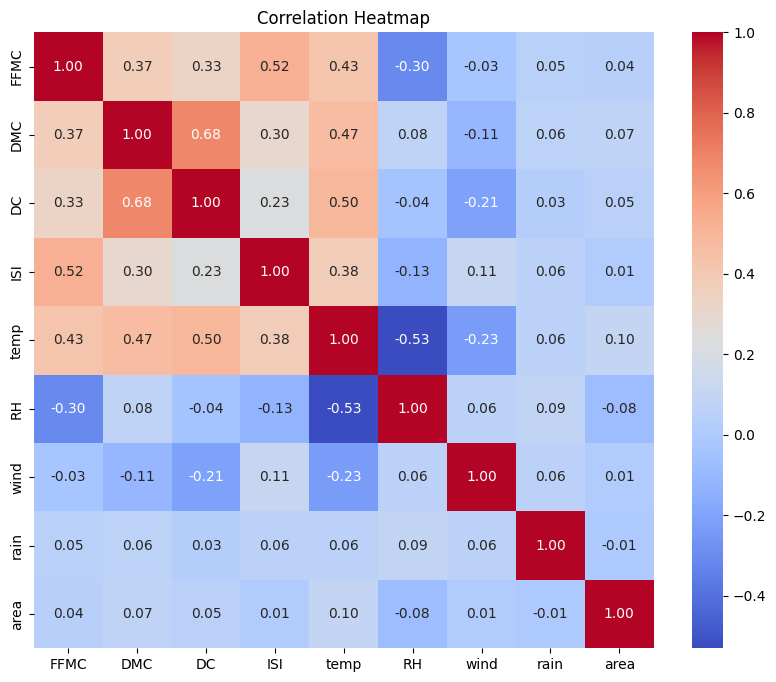

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

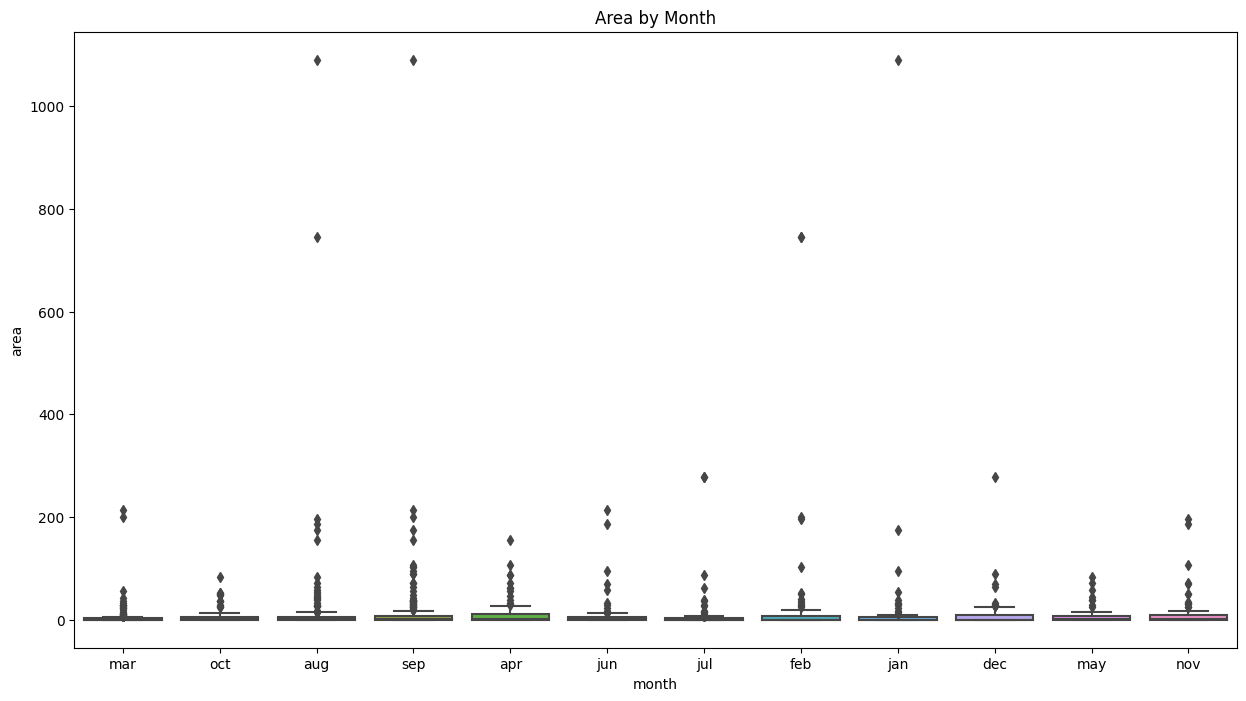

In [15]:
# Boxplots for 'area' by 'month' and 'day'
plt.figure(figsize=(15, 8))
sns.boxplot(x='month', y='area', data=data)
plt.title('Area by Month')
plt.show()

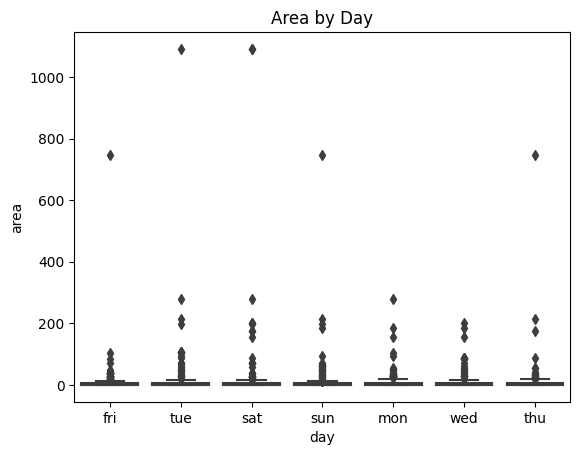

In [16]:
sns.boxplot(x='day', y='area', data=data)
plt.title('Area by Day')
plt.show()

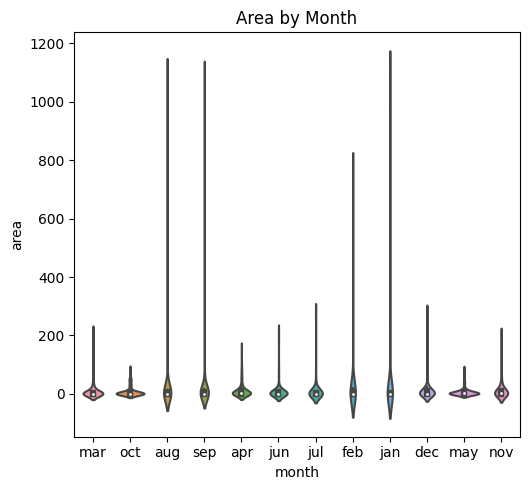

In [17]:
# Violin plots for 'area' by 'month' and 'day'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='month', y='area', data=data)
plt.title('Area by Month')
plt.tight_layout()
plt.show()

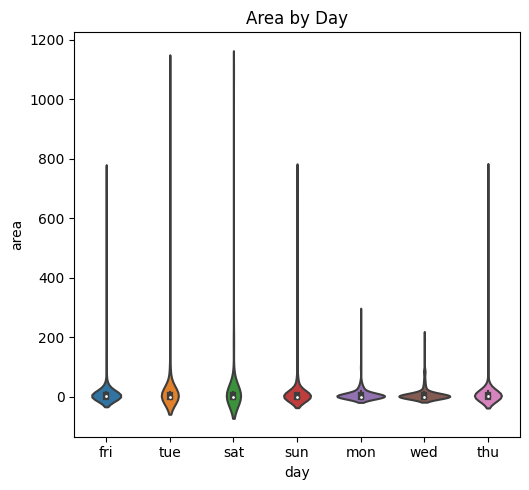

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.violinplot(x='day', y='area', data=data)
plt.title('Area by Day')
plt.tight_layout()
plt.show()

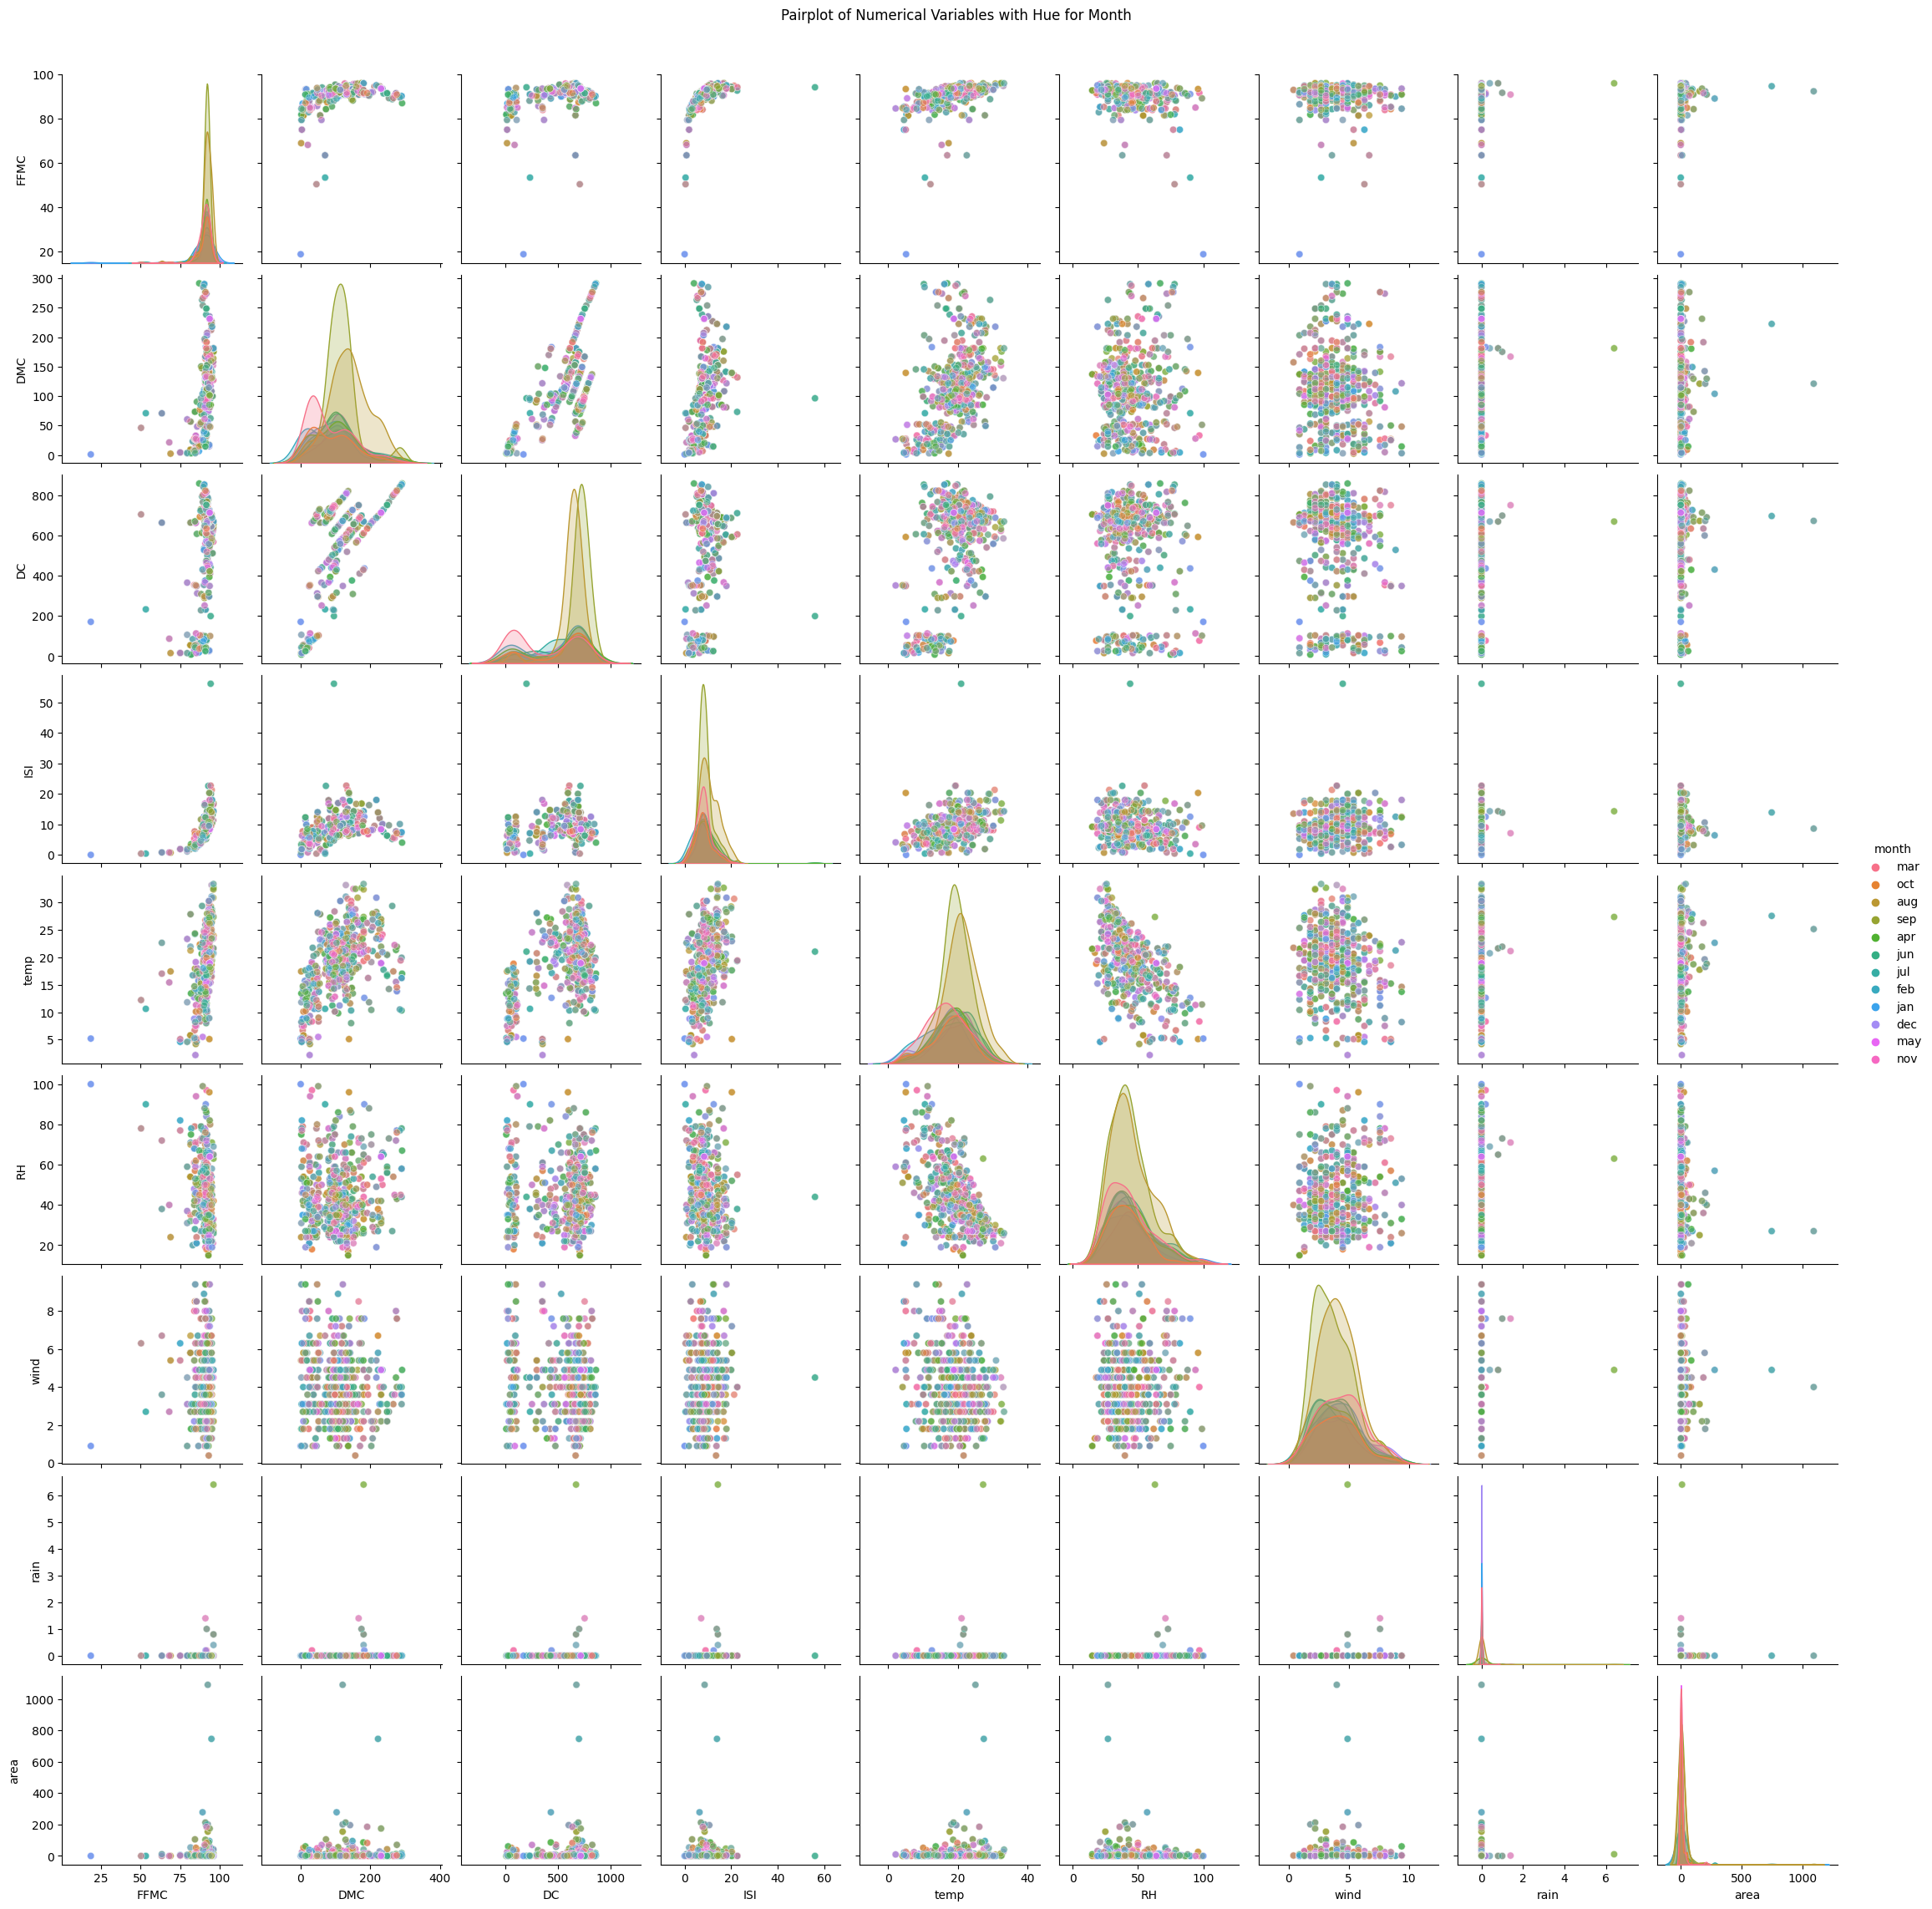

In [19]:
# Pairplot with hue for 'month'
sns.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'month']], hue='month', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Numerical Variables with Hue for Month', y=1.02)
plt.show()

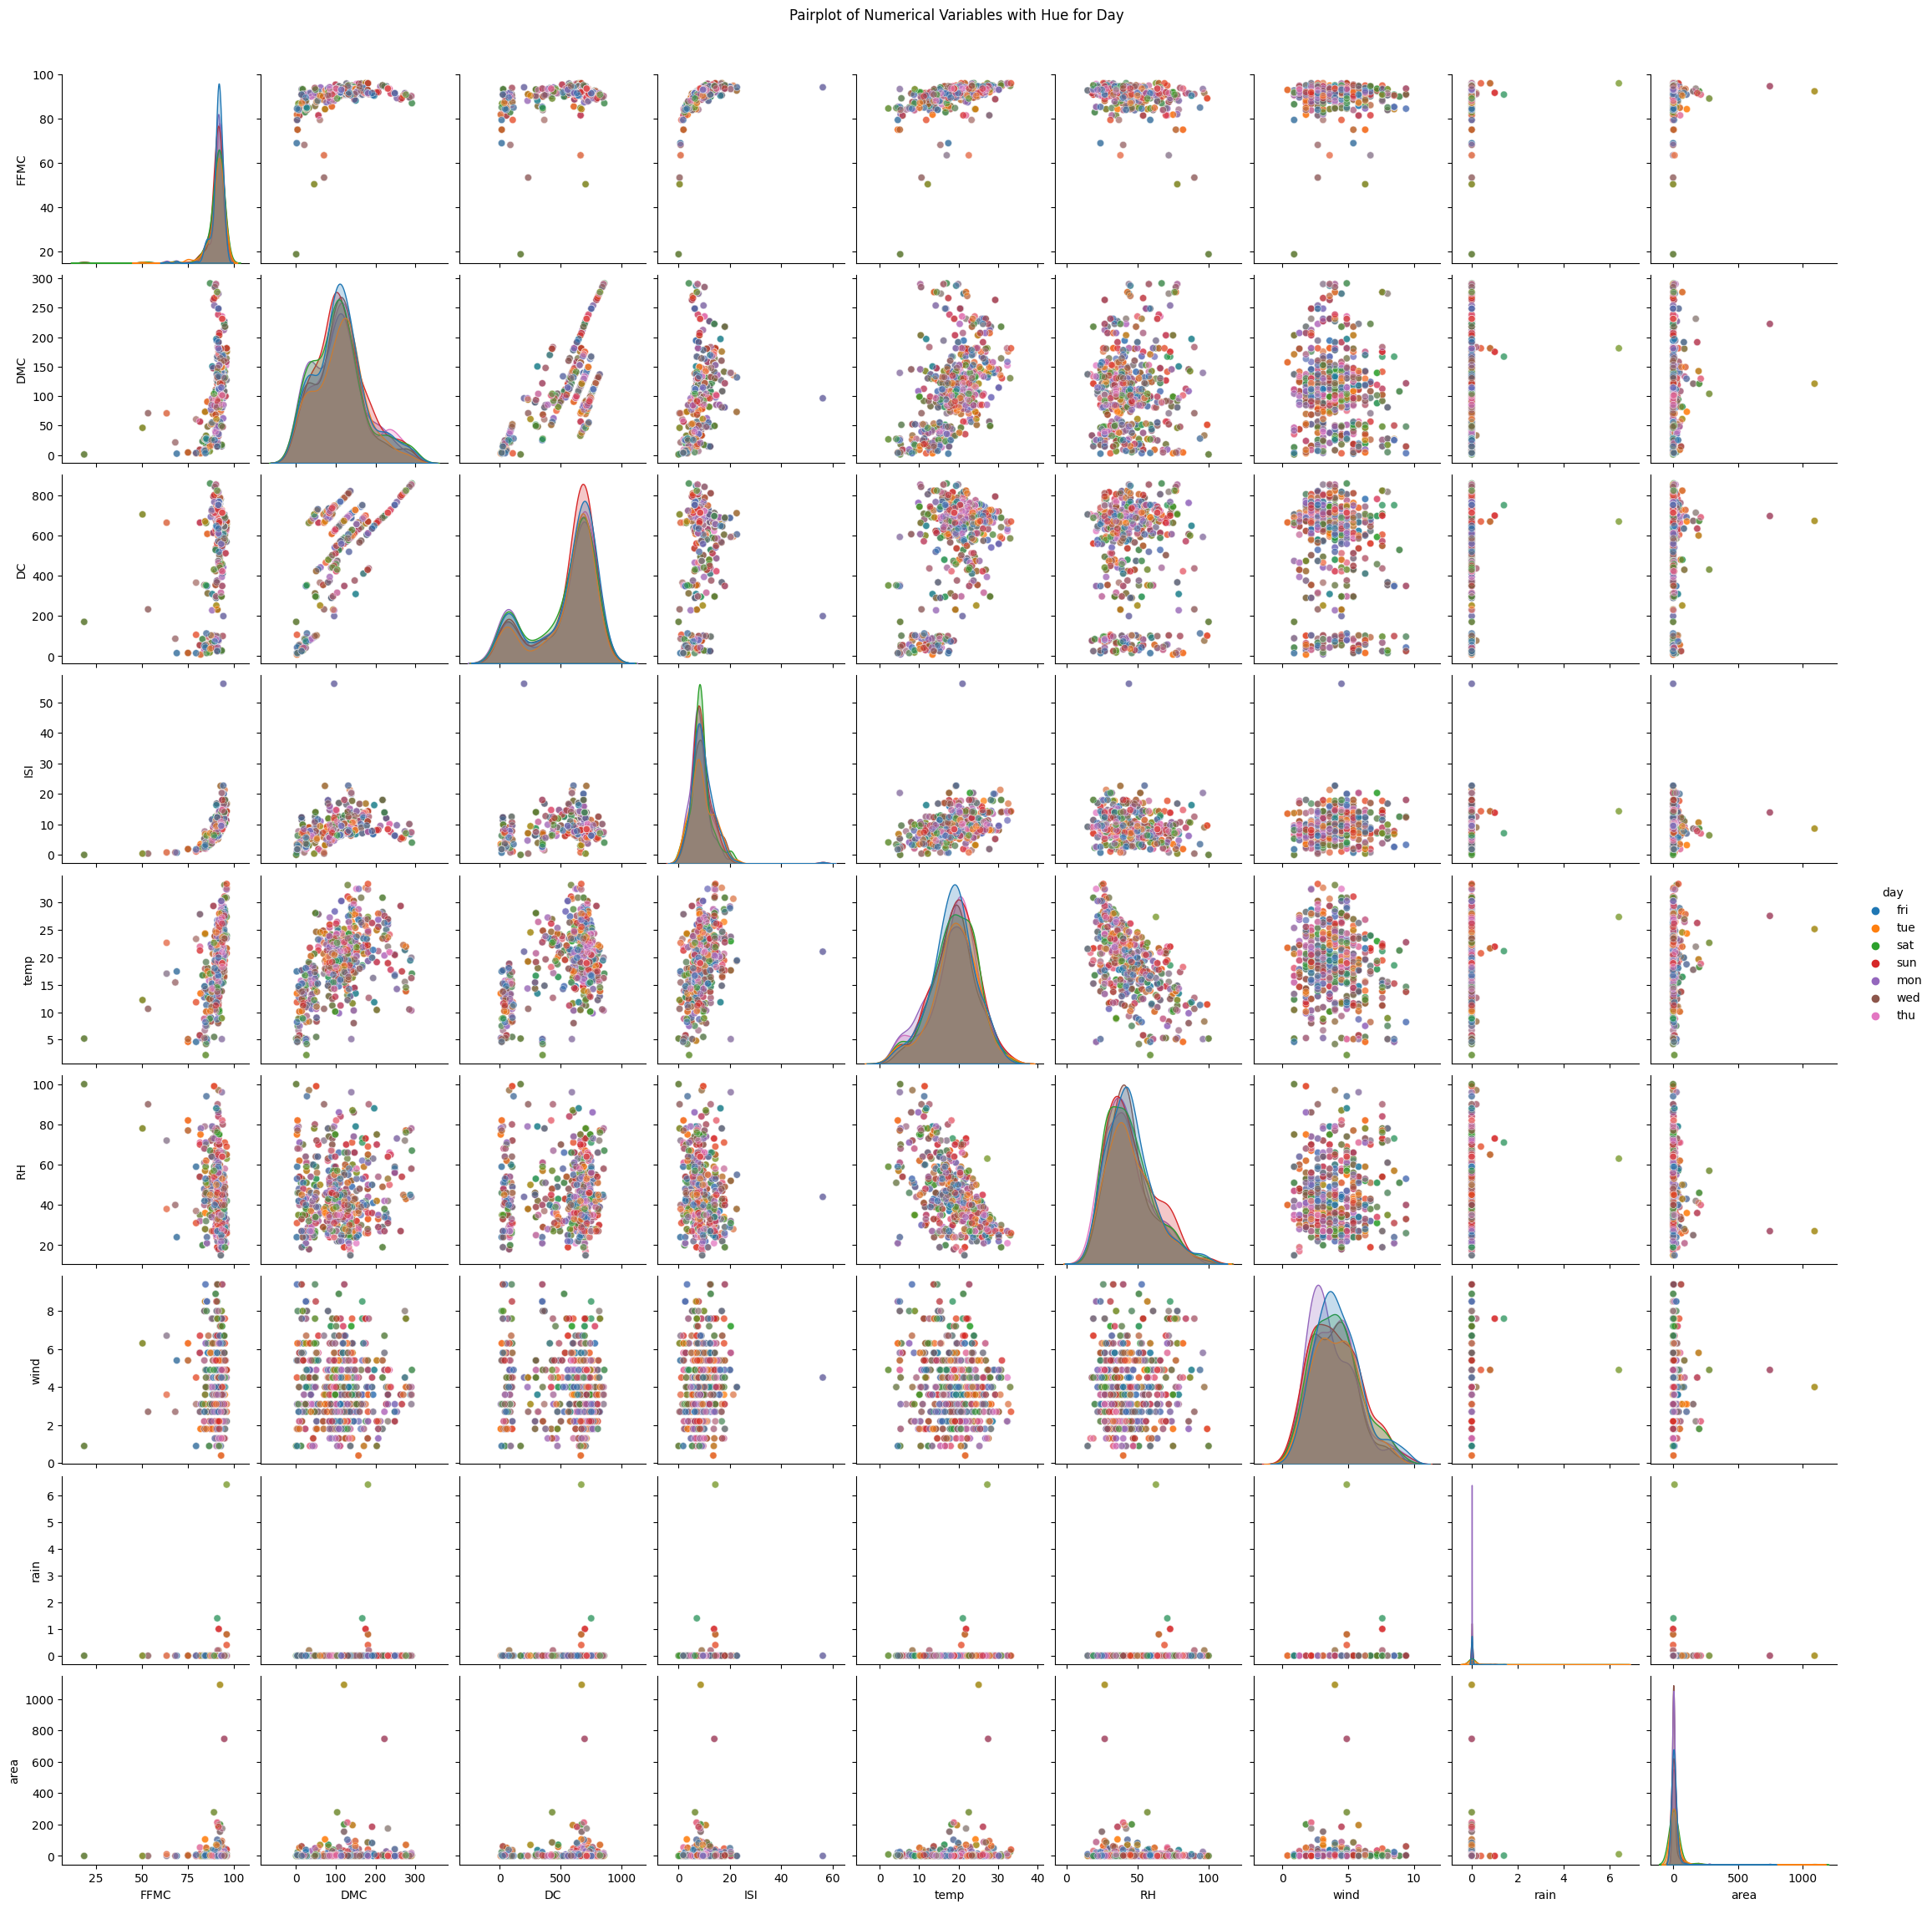

In [20]:
# Pairplot with hue for 'day'
sns.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'day']], hue='day', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Numerical Variables with Hue for Day', y=1.02)
plt.show()

## Splitting Data

In [21]:
# Define features and target variable
X = data[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['area']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Define numerical and categorical features
numerical_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_features = ['month', 'day']

In [24]:
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [25]:
# Create a column transformer to apply transformers to appropriate features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
# Define a list of models with their respective parameter grids for tuning
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Random Forest', RandomForestRegressor(), {'regressor__n_estimators': [50, 100, 200],
                                                'regressor__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingRegressor(), {'regressor__n_estimators': [50, 100, 200],
                                                        'regressor__max_depth': [3, 5, 10],
                                                        'regressor__learning_rate': [0.01, 0.1, 0.2]}),
    ('Lasso Regression', Lasso(), {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10]}),
    ('Support Vector Regression', SVR(), {'regressor__C': [0.1, 1, 10],
                                           'regressor__kernel': ['linear', 'rbf', 'poly']})
]

In [27]:
# Initialize variables to keep track of the best model and its performance
best_model_name = None
best_model = None
best_r2_score = -float('inf')

## Model Training and Parameter Tuning

In [28]:
# Define a list of models with their respective parameter grids for tuning
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Random Forest', RandomForestRegressor(), {'regressor__n_estimators': [50, 100, 200],
                                                'regressor__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingRegressor(), {'regressor__n_estimators': [50, 100, 200],
                                                        'regressor__max_depth': [3, 5, 10],
                                                        'regressor__learning_rate': [0.01, 0.1, 0.2]}),
    ('Lasso Regression', Lasso(), {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10]}),
    ('Support Vector Regression', SVR(), {'regressor__C': [0.1, 1, 10],
                                           'regressor__kernel': ['linear', 'rbf', 'poly']})
]

# Evaluate each model using GridSearchCV
for name, model, param_grid in models:
    # Create a pipeline with preprocessing and the current model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', model)])
    
    # Create a grid search with cross-validation
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its parameters
    best_model_for_iteration = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate the best model on the test set
    y_test_pred = best_model_for_iteration.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f'Best Model for {name}: {best_params}')
    print(f'R-squared (Test): {r2_test}')
    print('---')
    
    # Update the best model if the current model has a higher R-squared on the test set
    if r2_test > best_r2_score:
        best_r2_score = r2_test
        best_model_name = name
        best_model = best_model_for_iteration

# Print the overall best model
print(f'Overall Best Model: {best_model_name}')
print(f'Overall Best R-squared (Test): {best_r2_score}')

# Optionally, you can access the best model and its parameters for further use
print(f'Best Model: {best_model}')
print(f'Best Model Parameters: {best_model.named_steps["regressor"].get_params()}')

Best Model for Linear Regression: {}
R-squared (Test): 0.026707668539314833
---
Best Model for Random Forest: {'regressor__max_depth': 10, 'regressor__n_estimators': 50}
R-squared (Test): 0.5254703241517538
---
Best Model for Gradient Boosting: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
R-squared (Test): 0.9022095469734854
---
Best Model for Lasso Regression: {'regressor__alpha': 1}
R-squared (Test): 0.026479394303189907
---
Best Model for Support Vector Regression: {'regressor__C': 10, 'regressor__kernel': 'rbf'}
R-squared (Test): -0.03115829087177202
---
Overall Best Model: Gradient Boosting
Overall Best R-squared (Test): 0.9022095469734854
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['X', 'Y', 'FFMC', 'DMC',
                                                   'DC', 'ISI', 'temp', 'RH',
                         

## Best Model Predictions

In [29]:
# Predictions on the training set
y_train_pred_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_train_pred_best)
rmse_train_best = mean_squared_error(y_train, y_train_pred_best, squared=False)

print(f'R-squared (Training) - Best Model: {r2_train_best}')
print(f'RMSE (Training) - Best Model: {rmse_train_best}')

# Predictions on the test set
y_test_pred_best = best_model.predict(X_test)
r2_test_best = r2_score(y_test, y_test_pred_best)
rmse_test_best = mean_squared_error(y_test, y_test_pred_best, squared=False)

print(f'R-squared (Test) - Best Model: {r2_test_best}')
print(f'RMSE (Test) - Best Model: {rmse_test_best}')


R-squared (Training) - Best Model: 0.9907313393763016
RMSE (Training) - Best Model: 6.141404656873806
R-squared (Test) - Best Model: 0.9022095469734854
RMSE (Test) - Best Model: 20.657441108512856
